# Tendencias de videojuegos para 2017

## Introduccion

En la industria de los videojuegos, identificar qué factores determinan el éxito de un juego es esencial para optimizar nuestras estrategias comerciales. Como parte del equipo de Ice, una tienda online de videojuegos, tenemos acceso a datos desde 2016 que incluyen reseñas de usuarios y expertos, información sobre géneros y plataformas, y datos de ventas.

Nuestro objetivo es analizar estos datos para descubrir patrones que nos permitan predecir el rendimiento de los juegos. Esta información será clave para detectar proyectos prometedores y planificar campañas publicitarias efectivas para 2017 y más allá. Al aprovechar estos conocimientos, buscamos fortalecer nuestra posición en el mercado y ofrecer a nuestros clientes las mejores experiencias de juego.


## 1. Dicionario de datos

Se tiene una tabla con diferentes columnas, las cuales se muestran a continuación:

- `Name`: (Nombre)

- `Platform`: (Plataforma)

- `Year_of_Release`: (Año de lanzamiento)

- `Genre`: (Género) 

- `NA_sales`: (ventas en Norteamérica en millones de dólares estadounidenses) 

- `EU_sales`: (ventas en Europa en millones de dólares estadounidenses) 

- `JP_sales`: (ventas en Japón en millones de dólares estadounidenses) 

- `Other_sales`: (ventas en otros países en millones de dólares estadounidenses) 

- `Critic_Score`: (máximo de 100) 

- `User_Score`: (máximo de 10) 

- `Rating`: (ESRB)

## 2. Inicialización y cargar datos 

In [1]:
#Estas son las librerías a utilizar.
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns


In [2]:
games = pd.read_csv('games.csv')


## 3. Preparación de datos

In [3]:
games.info()
games.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.columns = games.columns.str.strip() #Se quitan los posibles espacios al inicio del nombre
games.columns = games.columns.str.lower() #Se convierte el nombre de las columnas a minúsculas
games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce') #se convierte el tipo de datos de la columna 'user_score' a float.
games['year_of_release'] = games['year_of_release'].astype('Int64')
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Probablemente mas adelante se usen los datos de 'user_score' para algun tipo de cálculos mas adelante, por lo que se decide cambiar los tipos de datos de esa columna a float.**

**El tipo de datos que se tenia en esa columna era object, ya que en algunos casos estaba la leyenda 'tbd' (to be determined), se decide cambiar estos valores por 'nan' y poder trabajar con datos flotantes, no se añden valores de 0 ya que afectaria los cálculos, simplemente se ignorarán.**

**No se convierte el tipo de datos de 'year_of_release' a formato de fecha ya que podemos trabajr con el tipo de datos como enteros.**

In [6]:
print (games.duplicated().sum()) #se comprueba que no existan filas completamente 


0


In [7]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] #se calcula el total de ventas para cada juego y se agrega a una nueva columna
games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Se añade una fila con el total de ventas a nuesto dataframe original**

## 4. Análisis de datos

Se realizará un análisis en funcion del paso del tiempo, se tienen datos desde el año 1980 hasta el 2016. 

Se buscara observar las ventas año con año y como ha ido cambiando la tendencia en los videojuegos, tambein en funcion de la plataforma en que se juegan y del pais donde se distrubuye.


In [8]:
print (games['year_of_release'].sort_values().unique()) #se verifican los años que se tienen para nuestro conjuntoo de 


<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, <NA>]
Length: 38, dtype: Int64


<Axes: title={'center': 'En los ultimos años la industria de los videojuegos ha tenido muchos mas lanzamientos'}, xlabel='Año de lanzamiento', ylabel='Número de juegos'>

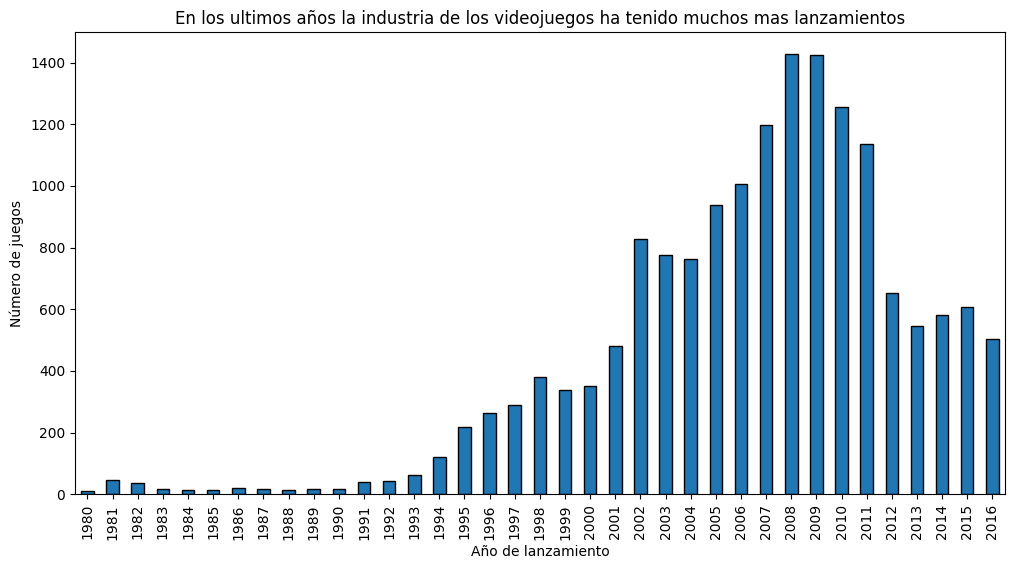

In [9]:
releases_per_year = games.groupby('year_of_release').size() #se agrupan los datos por año de lanzamiento

#a continuacion se crea un grafico par poder observar el numero de juegos lanzados popr año
releases_per_year.plot(kind='bar', title= 'En los ultimos años la industria de los videojuegos ha tenido muchos mas lanzamientos', xlabel='Año de lanzamiento', ylabel='Número de juegos', edgecolor= 'black', figsize= [12, 6])

**Se observa la distribucion de los lanzamientos a lo largo de los años y se ve que se tiene un crecimiento gigantesco en la epoca moderna.**

In [10]:
sales_by_plataform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False) #se calculan las ventas totales en cada plataforma 
sales_by_plataform.head(10) #se imprimen las 10 plataformas con mas ventas


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

In [11]:
plataform_top = sales_by_plataform.index[:10]  #se filtra el top 10 de plataformas con juegos mas vendidos.
games_top = games[games['platform'].isin(plataform_top)].reset_index(drop= True) #se crea un nuevo df en base a las plataformas que tienen mas ventas
games_top.head(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
5,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
6,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
7,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
8,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
9,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


<Axes: title={'center': 'Plataformas con videojuegos mas vendidos en el tiempo'}, xlabel='Año de lanzamiento', ylabel='Ventas totales (millones)'>

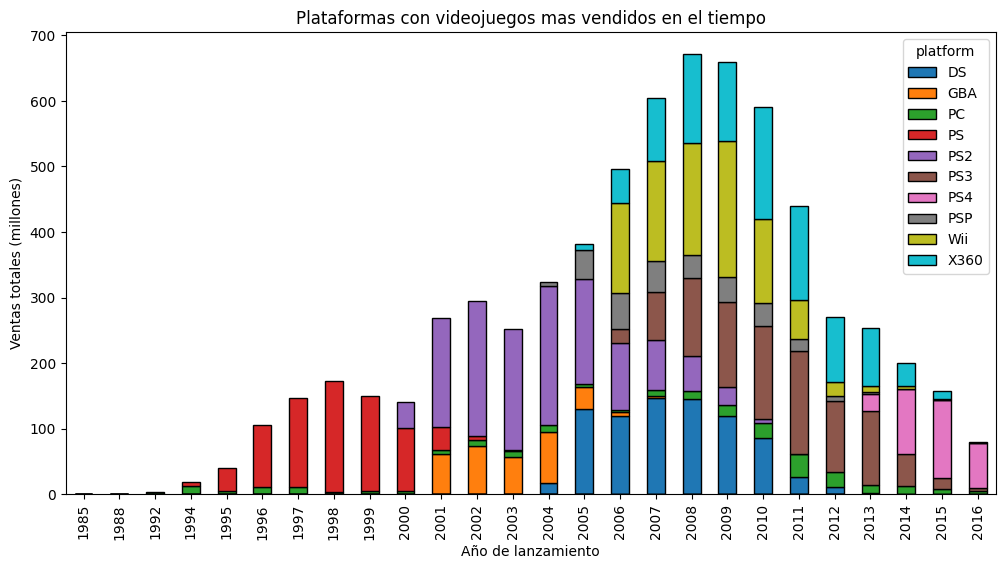

In [12]:
releases_per_year_top = games_top.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack() #se agrupan los datos por año de lanzamiento y plataforma en el nuevo df

#a continuacion se crea un grafico par poder observar el numero de juegos lanzados por año
releases_per_year_top.plot(kind='bar', title= 'Plataformas con videojuegos mas vendidos en el tiempo', stacked= True, xlabel='Año de lanzamiento', ylabel='Ventas totales (millones)', edgecolor= 'black', figsize= [12, 6])


**Aqui se observan las 10 plataformas con mas juegos vendidos en la historia, también cabe aclarar que no necesariamente estas plataformas siguen estando vigentes en la actualidad, y que algunas de las plataformas actuales son muy jovenes como para hacer una comparacion correcta de cual ha sido mas exitosa**

#### *Examinamos las plataformas en base a los años que han durado en el mercado*

In [48]:
#ahora se analizaran las plataformas que estan en declive
ventas_por_año = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value= 0) #Se agrupan los datos por años y plataformas para analizar cuando tuvieron sus ultimas ventas

years = ventas_por_año.index #obtenemos y guardamos los años que se tienen registros

plataformas_en_declive = []

for plataforma in ventas_por_año.columns:
    ventas = ventas_por_año[plataforma]
    # Comprobar si hubo ventas en algún año
    if (ventas > 0).any():
        # Verificar si hay años con ventas y después años sin ventas
        if (ventas[ventas > 0].index[-1] < years[-1]):
            plataformas_en_declive.append(plataforma)

#mostrar las plataformas en declive
print ('Estas plataformas ya no han lanzado juegos en algunos años:')
print(plataformas_en_declive) #con esto se observan las plataformas que no han lanzado juegos en algunos años y por lo tanto ya no existen


Estas plataformas ya no han lanzado juegos en algunos años:
['2600', '3DO', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2', 'PSP', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'XB']


<Axes: title={'center': 'Algunas de las plataformas que ya no existen, tuvieron mucho éxito en su tiempo'}, xlabel='Plataforma', ylabel='Duracion en el mercado (años)'>

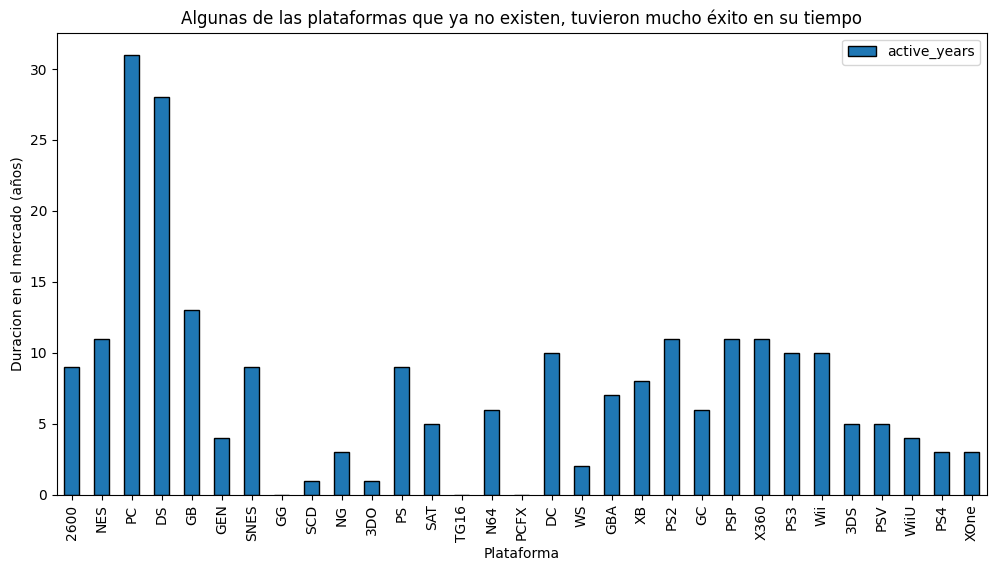

In [14]:
# Obtener el año de lanzamiento de la primera y última aparición de cada plataforma
first_release_years = games.groupby('platform')['year_of_release'].min()
last_release_years = games.groupby('platform')['year_of_release'].max()

# se crear un DataFrame para visualizar la información
platform_duration = pd.DataFrame({
    'first_release': first_release_years,
    'last_release': last_release_years
})

# Calcular la duración activa de cada plataforma
platform_duration['active_years'] = platform_duration['last_release'] - platform_duration['first_release']

platform_duration = platform_duration.sort_values('first_release') #se ordenan las plataformas en funcion de la primera aparicon que tuvieron 

#se crea un gráfico para observar el tiempo de vida de las plataformas, ordenando desde la mas vieja a la mas nueva
platform_duration.plot(kind='bar', title= 'Algunas de las plataformas que ya no existen, tuvieron mucho éxito en su tiempo', stacked= True, y= 'active_years', xlabel='Plataforma', ylabel='Duracion en el mercado (años)', edgecolor= 'black', figsize= [12, 6])


**El gráfico anterior muestra las plataformas en orden en que fueron apareciendo en el mercado, se puede observar las plataformas que mas han tenido éxito, siendo un gran ejemplo la PC que desde el momento en que salio al mercado sigue estando vigente hasta la actualidad, también se pueden ver las plataformas mas recientes que tienen poco tiempo de haber salido, e incluso hay algunas plataformas que no duraron ni un año**

In [53]:
#Comparamos las plataformas que siguen estando vigentes contra las que ya no
plataformas_activas = platform_duration.index.difference(plataformas_en_declive)

print(f'Estas plataformas siguen en el mercado:')
print (plataformas_activas) #estas son las plataformas que siguen activas en el 2016

Estas plataformas siguen en el mercado:
Index(['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'], dtype='object', name='platform')


#### *¿Cuanto tiempo tardar en aparecer y desaparecer las plataformas de vudeojuegos?*

In [16]:
#se calcula la diferencia entre años de lanzamiento de las plataformas
release_diffs = first_release_years.diff().dropna()
average_time_between_releases = release_diffs.mean() #se calcula el promedio de años entre cada lanzamiento
print (f"Tiempo promedio entre lanzamientos de plataformas: {average_time_between_releases:.2f} años")


Tiempo promedio entre lanzamientos de plataformas: 1.10 años


In [17]:
# para saber cuanto tiempo tardan en desaparecer las plataformas, obtenemos la mediana del tiempo que duraron en el mercado 
# las plataformas que ya no se comercializan más, se calcula la mediana ya que se tiene por lo menos un valor atípico
games_inactivos = platform_duration[platform_duration.index.isin(plataformas_en_declive)]
median_games_inact = games_inactivos['active_years'].median()
print (f"Tiempo en que tardan en desaparecer las plataformas: {median_games_inact:.2f} años")


Tiempo en que tardan en desaparecer las plataformas: 6.50 años


**Con el análisis anterior podemos observar que el tiempo en que tardan en aparecer nuevas platformas en relativamente corto, lo que indica en un inicio que hay crecimiento muy rapido en la industria. Por otro lado, se puede observar que tardan alrededor de 6.5 años en desaparecer, lo cual tampoco es mucho, esto puede indicar que hubo mucha competencia en el mercado** 

**Se va a continuar solo con datos relevantes para el anális, con datos del año 2000 en adelante, y solo con las plataformas que aún sigan activas**

### Análisis para juegos del 2000 en adelante

In [18]:
games_2000 = games[games['year_of_release'] >= 2000] #se filtran los datos a partir del año 2000
games_2000 = games_2000[games_2000['platform'].isin(plataformas_activas)].reset_index(drop= True) #se filtra el df anterior solo con las plataformas que aun siguen vigentes

games_2000.head() #con este df se trabajará de aqui en adelante

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
4,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32


<Axes: title={'center': 'Muchas plataformas que tienden a subir sus ventas muy rápido, tambien las bajan muy rápido'}, xlabel='año', ylabel='ventas (en millones de dollares)'>

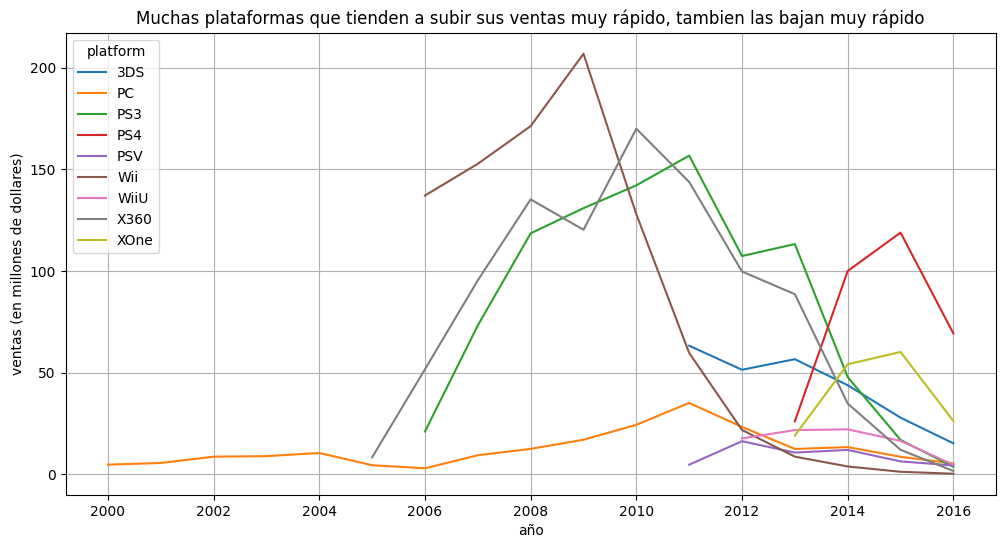

In [19]:
sales_by_plataform_2000 = games_2000.groupby('platform')['total_sales'].sum().sort_values(ascending=False) #agrupamos nuestro nuev df por plataforma para el total de ventas

sales_over_years = games_2000.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack() #calculamos las ventas a lo largo de los años
sales_over_years.plot(kind='line', figsize=(12, 6), title='Muchas plataformas que tienden a subir sus ventas muy rápido, tambien las bajan muy rápido', xlabel='año', ylabel= 'ventas (en millones de dollares)', grid = True) #se crea un grafico de lineas


**Se observa en la grafica el comportamiento de ventas de las plataformas actuales. Un punto importante es que para el caso de la pc, pareciera que no tiene muchas ventas, sin embargo, como vimos desde el análisis anterior es una plataforma constante y que sigue vigente después de muchisimo tiempo.**

**Vemos también que hay plataformas como Xbox One y PS4 que son las que actualmente estan en su auge.**

In [20]:
#ahora la intencion es ver la puntuacion de los criticos y los usuarios y ver si tiene relacion con el total de ventas
profitable_platforms = games_2000[(games_2000['critic_score'] > 70) & (games_2000['user_score'] > 7)] #filtramos los juegos que tienen calificaciones altas tanto de la critica como de los usuarios
profitable_platforms_summary = profitable_platforms.groupby('platform')['total_sales'].mean().sort_values(ascending=False) #agrupamos la lsita anterior para poder ver cuales plataformas tienen mas ventas en base a las criticas
# para este ultimo punto se decidi
profitable_platforms_summary

platform
Wii     2.696818
X360    1.499536
PS3     1.448380
3DS     1.358281
WiiU    1.243659
PS4     1.019072
XOne    0.727037
PSV     0.307869
PC      0.305485
Name: total_sales, dtype: float64

**Con nuestro ultimo analisis obtenemos el promedio de juegos vendidos en cada plataforma a lo largo de los años, esto nos es de especial utilidad ya que nos muestra un panorama mas real sobre el comportamiento de los consumidores, tambien hay que tener en cuenta que, aunque algunas plataformas como la pc estan relativamente abajo en el puesto, tienen ventas constantes y tienen una larga trayectoria sin salir del mercado.**

**Como muestra nuestra gráfica anterior, las plataformas mas actuales son las que de momento tienen mas ventas, por lo que se consideran el PS4, el XOne, el 3DS y por ultimo la PC como las plataformas mas rentables, esta ultima aunque en promedio tiene ventas mas bajas que sus competidores, no podemos dejarla fuera de nuestro analisis ya que se ha mantenido constante a lo largo de los años.**

#### *Analisamos las plataformas que consideramos hasta el momento las "mas rentables"*

In [21]:
potential_platforms = ['PS4', 'XOne', '3DS', 'PC'] #hacemos una lista con las plataformas que consideramos potencialmente rentables

platforms_2000_potential = games_2000[games_2000['platform'].isin(potential_platforms)] #Se hace un nuevo df con solo las plataformas de interés
platforms_2000_potential.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
13,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
19,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
21,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
23,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


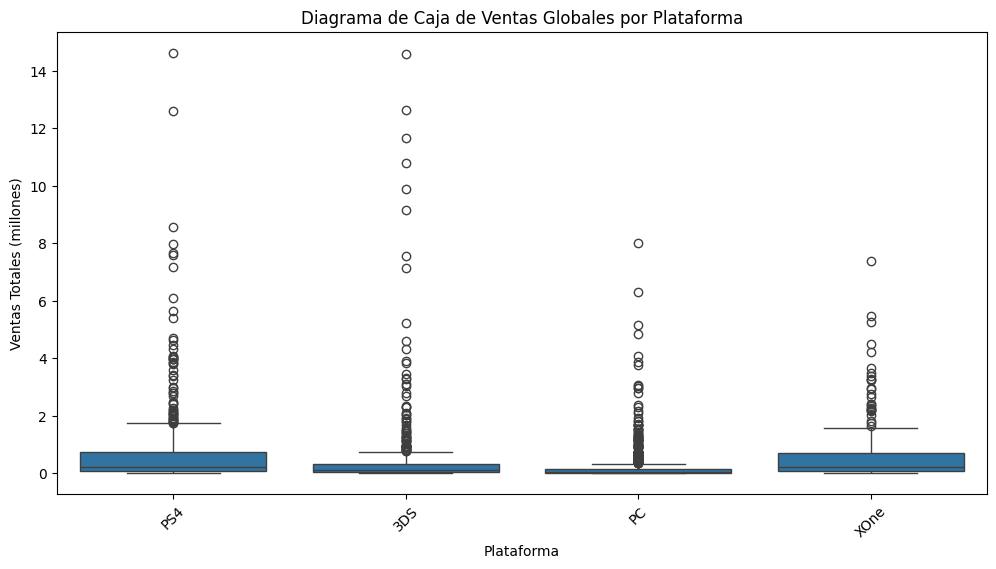

In [22]:
# Se crean diagramas de caja para las plataformas seleccionadas
plt.figure(figsize=(12, 6))
sns.boxplot(data=platforms_2000_potential, x='platform', y='total_sales')
plt.title('Diagrama de Caja de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()

In [23]:
avg_sales = platforms_2000_potential.groupby('platform')['total_sales'].mean() #se obtiene la media de los juegos vendidos en cada plataforma
print(avg_sales.sort_values(ascending=False))

platform
PS4     0.801378
XOne    0.645020
3DS     0.503535
PC      0.224340
Name: total_sales, dtype: float64


**Se observan que en todas las plataformas hay muchos valores atipicos. Tambien se pueden enumerar las plataformas que han tenido mas a menos ventas, en este caso, PS4 ha tenido el mayor numero de ventas, seguido de XOne, despues 3DS y por ultimo PC. Se vuelve a recalcar que aunque las ventas de pc son mucho menores que las otras plataformas, seguimos viendolo con mucho potencial ya que se ha mantenido constante en sus ventas a lo largo de los años, siendo la mas longeva de las 4 plataformas**

**Ya que no se alcanza a ver el promedio de ventas facilmente en nuestro diagrama de cajas, tambien se opto por ver estos valores de manera numerica**

#### *Analizando PS4*

In [24]:
# Se obtienen los datos solo para PS4
ps4 = platforms_2000_potential[platforms_2000_potential['platform'] == 'PS4'].dropna(subset=['critic_score', 'user_score', 'total_sales'])

ps4['user_score'] = ps4['user_score'] * 10 #Esta linea la usamos para normalizar la escala de criticas y poder tener una correcta visualizacion posteriormente


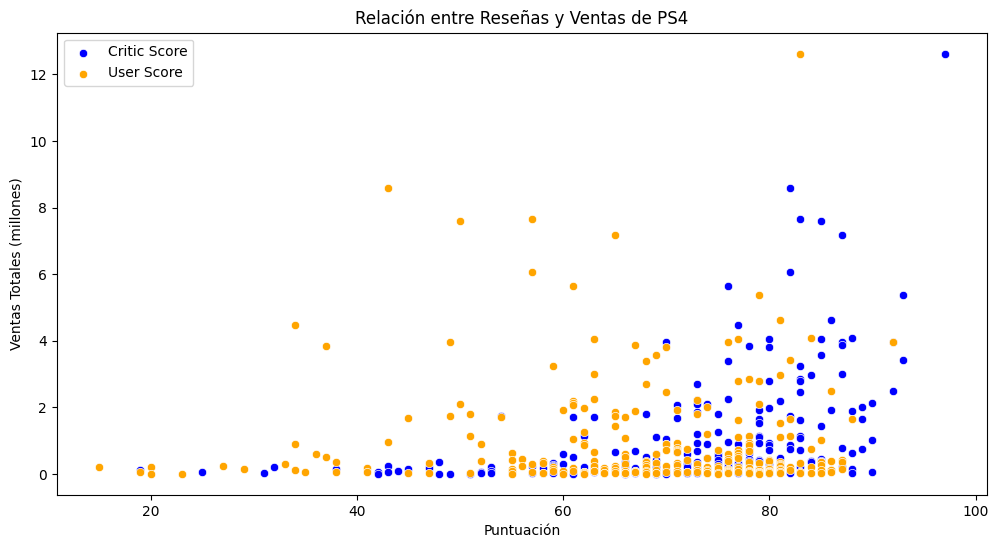

In [25]:
#Se crea un grafico de dispersion para ver como se relacionan las ventas con la critica tanto de profesionales como de jugadores 
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4, x='critic_score', y='total_sales', label='Critic Score', color='blue')
sns.scatterplot(data=ps4, x='user_score', y='total_sales', label='User Score', color='orange')
plt.title('Relación entre Reseñas y Ventas de PS4')
plt.xlabel('Puntuación')
plt.ylabel('Ventas Totales (millones)')
plt.legend()
plt.show()

In [26]:
critic_corr = ps4['critic_score'].corr(ps4['total_sales'])
user_corr = ps4['user_score'].corr(ps4['total_sales'])

print(f'Correlación entre las reseñas de críticos y ventas: {critic_corr}')
print(f'Correlación entre las reseñas de usuarios y ventas: {user_corr}')

Correlación entre las reseñas de críticos y ventas: 0.4058948014583667
Correlación entre las reseñas de usuarios y ventas: -0.03362497596528885


**En el grafico podemos notar que, extrañamente, existe una correlacion negativa entre la critica de los usuarios y las ventas de los videojuegos. Mientras que en el caso de las reseñas de profesionales vs ventas existe una correlacion positiva**

**Posteriormente esto lo volvemos a verificar con las siguientes lineas de codigo, notando que exite una correlacion de 40 porciento en cuanto a la critica profesional, y un -3 porciento en cuanto a las calificaciones de los usuarios**

**Por lo tanto, usar las criticas de los profesionales nos ayudara mucho mas a predecir el comportamiento de ventas**

#### *Comparacion de juegos en común de las otras plataformas con PS4*

In [27]:
# Identificamos juegos en común
common_games = platforms_2000_potential['name'].value_counts()
common_games = common_games[common_games == len(potential_platforms)].index

# Filtrar el DataFrame para conservar solo los juegos comunes
platform_common = platforms_2000_potential[platforms_2000_potential['name'].isin(common_games)]

# Agrupar por nombre y plataforma, sumando las ventas
game_sales_common = platform_common.groupby(['name', 'platform'])['total_sales'].sum().unstack().fillna(0)

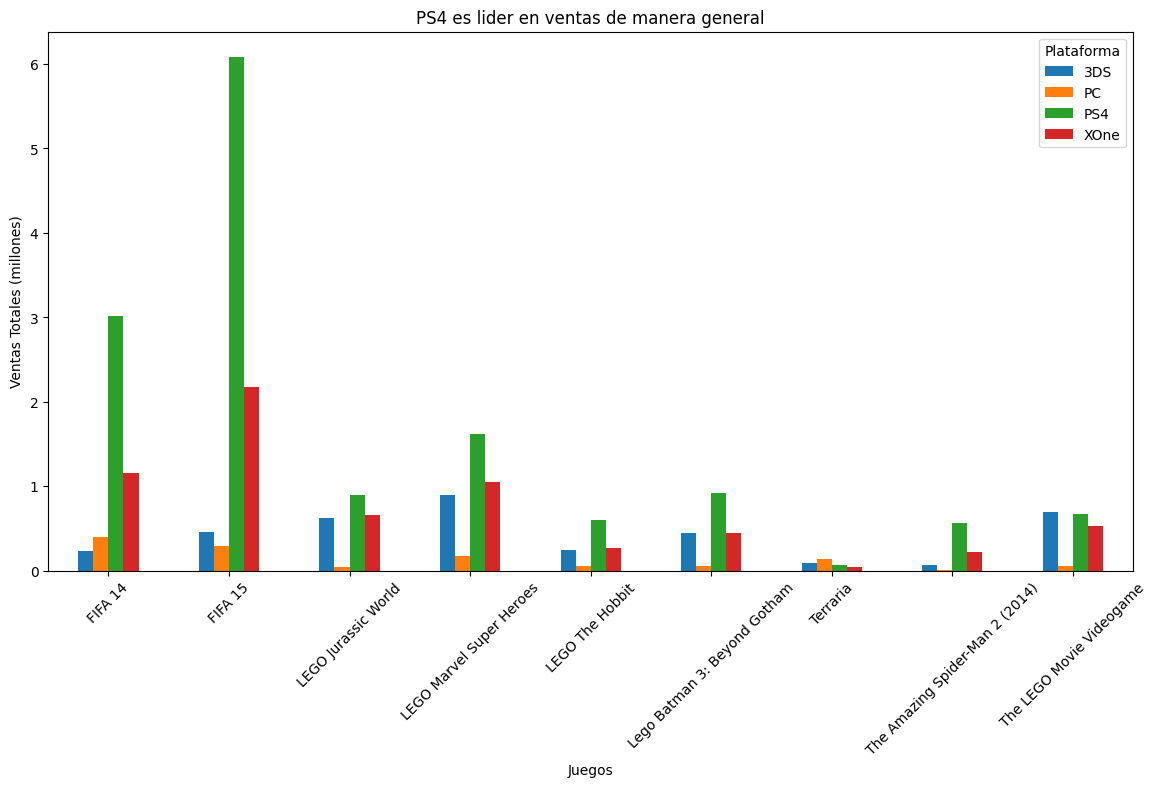

In [28]:
#Se crea un grafico de barras para poder comparar las ventas
game_sales_common.plot(kind='bar', figsize=(14, 7))
plt.title('PS4 es lider en ventas de manera general')
plt.xlabel('Juegos')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.show()

**Se tiene la comparacion de juegos que hay en común entre las 4 plataformas, como se puede observar son pocos y esto no nos muestra un panorama real del comportamiento de las ventas, ya que en este punto influyen otros factores tales como que hay algunos juegos qye esran optimizados mas para una plataforma u otra, tambien hay juegos exclusivos de cada plataforma**

#### *¿Cuales son los generos favoritos de los jugadores?*

In [29]:
genre_sales_per_genre = games_2000.groupby('genre')['total_sales'].sum().sort_values(ascending=False) # Agrupamos por género y sumamos las ventas totales
genre_sales_per_genre

genre
Action          894.88
Shooter         687.80
Sports          663.08
Misc            394.09
Role-Playing    343.16
Racing          246.52
Platform        195.18
Fighting        142.47
Simulation      134.09
Adventure        76.70
Strategy         54.31
Puzzle           24.47
Name: total_sales, dtype: float64

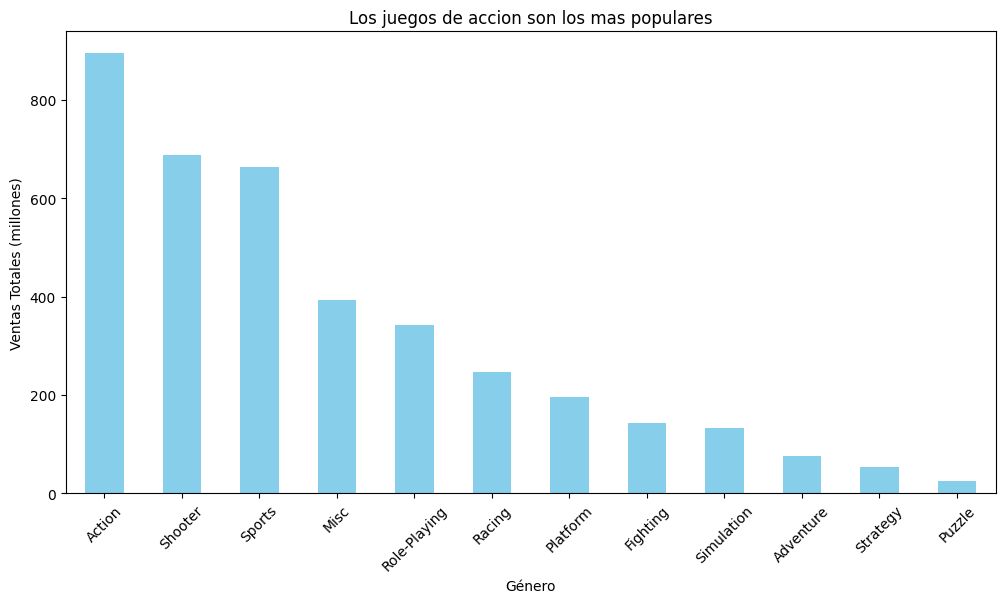

In [30]:
#se hace un gráico de barras para visualizar lo anterior
plt.figure(figsize=(12, 6))
genre_sales_per_genre.plot(kind='bar', color='skyblue')
plt.title('Los juegos de accion son los mas populares')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()

**Claramente se ve que los generos que dominan las ventas son los de acción, disparos y deportes, dejando muy atras a los demas generos analizados. Esto puede deberse a diferentes factores, como la publicidad que se les da o la cantidad de juegos lanzados de un genero. Tambien se puede ver los juegos que son menos populares tles como los puzzles, estrategia y aventura.**

## 5. Perfil de usuario por regiones

#### *Plataformas que mas venden por región*

In [31]:
# Ventas por plataforma en cada región
na_platform_sales = games_2000.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5) #se agrupan las ventas en norte america por plataforma
eu_platform_sales = games_2000.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5) #se agrupan las ventas en europa por plataforma
jp_platform_sales = games_2000.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)#se agrupan las ventas en japón por plataforma


In [32]:
# Combinamos los resultados en un DataFrame para poder analizar las cuotas de mercado por region
platforms_summary = pd.DataFrame({
    'NA Sales': na_platform_sales,
    'EU Sales': eu_platform_sales,
    'JP Sales': jp_platform_sales
}).fillna(0)

platforms_summary

,NA Sales,EU Sales,JP Sales
platform,,,
3DS,0.00,0.00,100.62
PC,0.00,121.34,0.00
PS3,390.13,327.21,79.41
PS4,108.74,141.09,15.96
PSV,0.00,0.00,21.84
Wii,486.87,258.32,68.28
X360,595.74,268.32,0.00
XOne,93.12,0.00,0.00


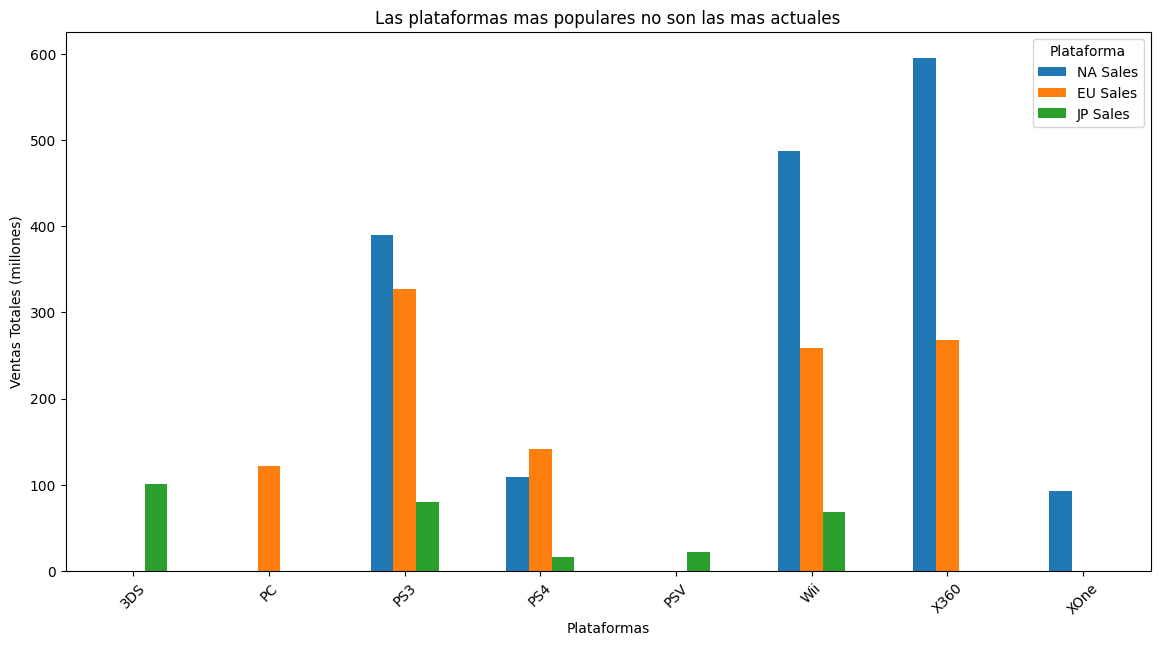

In [33]:
#Se muestra un grafico para ver la comparacion de las ventas por región
platforms_summary.plot(kind='bar', figsize=(14, 7))
plt.title('Las plataformas mas populares no son las mas actuales')
plt.xlabel('Plataformas')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.show()

**Se observa en el gráfico claramente que en las 3 regiones comparten consolas favoritas, sin embargo, las 5 plataformas favoritas de cada region no son las mismas.**

**Podemos afirmar que de manera general en las plataformas actuales norte america es la región que suele tener mayores ventas en diferentes plataformas**

#### *Generos mas vendidos por región*

In [34]:
#de la misma forma que en el análisis anterior, ahora se argupan por generos para cada región
na_genre_sales = games_2000.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5) #se agrupan los generos mas populares en norte america
eu_genre_sales = games_2000.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5) #se agrupan los generos mas populares en europa
jp_genre_sales = games_2000.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5) #se agrupan los generos mas populares en japón


In [35]:
genres_summary = pd.DataFrame({
    'NA Sales': na_genre_sales,
    'EU Sales': eu_genre_sales,
    'JP Sales': jp_genre_sales
}).fillna(0)
genres_summary

,NA Sales,EU Sales,JP Sales
genre,,,
Action,417.96,301.95,73.02
Misc,218.86,112.59,26.26
Platform,0.00,0.00,22.58
Racing,0.00,99.89,0.00
Role-Playing,139.68,0.00,79.22
Shooter,357.43,232.94,0.00
Sports,337.56,224.40,31.15


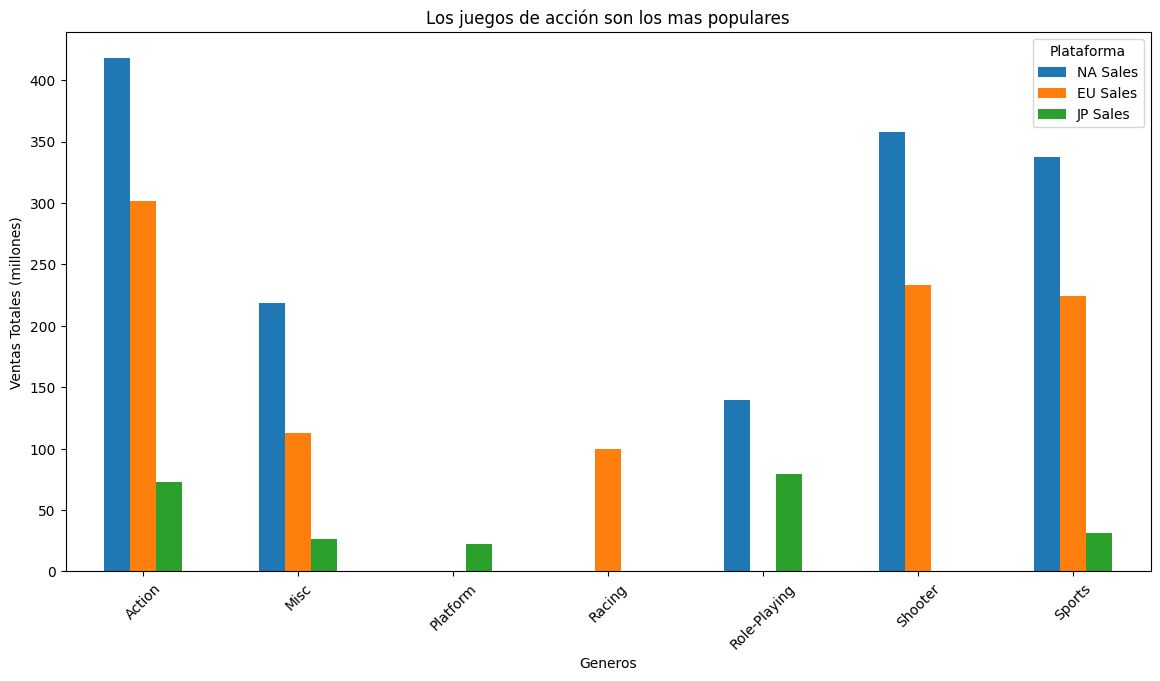

In [36]:
#Se muestra un grafico para ver la comparacion de las ventas para cada región por genero
genres_summary.plot(kind='bar', figsize=(14, 7))
plt.title('Los juegos de acción son los mas populares')
plt.xlabel('Generos')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.show()

**Con este analisis seguimos viendo que de manera consistente los generos lideres en el mercado son acción, disparos y deportes.**

**Tambien se reafirma que el mercado de norte america es de los principales consumidores de videojuegos**

#### *Análisis para clasificacion ESRB*

In [37]:
esrb_sales = games_2000.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
esrb_sales

,na_sales,eu_sales,jp_sales
rating,,,
E,544.44,354.36,78.89
E10+,230.99,134.16,13.58
EC,0.71,0.00,0.00
M,555.17,389.22,39.84
RP,0.00,0.03,0.00
T,357.76,221.19,53.41


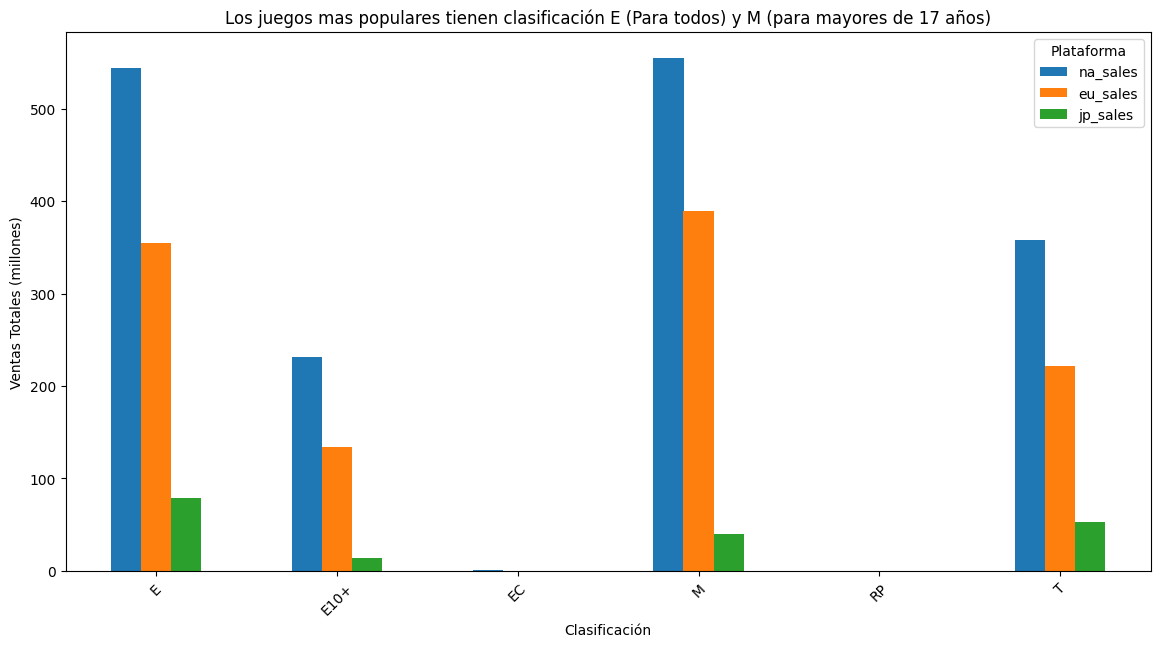

In [38]:
#Se muestra un grafico para ver la comparacion de las ventas para cada región por genero
esrb_sales.plot(kind='bar', figsize=(14, 7))
plt.title('Los juegos mas populares tienen clasificación E (Para todos) y M (para mayores de 17 años)')
plt.xlabel('Clasificación')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.show()

**De manera general se observa que los juegos con clasificacion para niños son las que menos suelen ser populares, por otro lado se observa que las clasificaciones preferiadas por los usuarios, son para mayores de 17 años, lo que nos da una idea sobre quien suele ser nuestro publico objetivo.**

## 5. Prueba de hipótesis

#### *Hipotesis 1*

In [39]:
hip_1 = games_2000[games_2000['platform'].isin(['XOne', 'PC'])] #Se hace un nuevo df con solo las plataformas de interés
hip_1.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
45,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,8.01
52,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
75,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.00,0.00,93.0,7.3,T,6.29
89,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
94,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26


In [40]:
users_score_xone_mean = hip_1[hip_1['platform'] == 'XOne']['user_score'].dropna().mean() #Se calcula la media para las crititcas de usuarios en Xbox One
user_score_xone_variance = np.var(hip_1[hip_1['platform'] == 'XOne']['user_score'].dropna()) #Se calcula la varianza para las criticas de usuarios en Xbox One

print ('Estadisticas para XOne;') #Se imprime un mensaje
print ('Media:', users_score_xone_mean, 'Varianza:', user_score_xone_variance) #Se imprime las estadisticas
print ( )

users_score_pc_mean = hip_1[hip_1['platform'] == 'PC']['user_score'].dropna().mean() #Se calcula la media para las crititcas de usuarios en PC
user_score_pc_variance = np.var(hip_1[hip_1['platform'] == 'PC']['user_score'].dropna()) #Se calcula la varianza para las criticas de usuarios en PC

print ('Estadisticas para PC;') #Se imprime un mensaje
print ('Media:', users_score_pc_mean, 'Varianza:', user_score_pc_variance) #Se imprime las estadisticas

Estadisticas para XOne;
Media: 6.521428571428572 Varianza: 1.8965188383045526

Estadisticas para PC;
Media: 7.0340599455040875 Varianza: 2.310474797496455


 **Con estas estadisticas podemos interpretar que los juegos en PC tienden a ser mejor valorados en promedio en comparación con los de Xbox One, pero las calificaciones en PC muestran una mayor variabilidad. Esto sugiere que los juegos para PC pueden ofrecer tanto experiencias excepcionales como decepcionantes, mientras que los juegos de Xbox One tienden a ofrecer una experiencia más uniforme, aunque moderadamente calificada.**

- Hipotesis nula (H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

- Hipotesis alternativa (H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


In [41]:
# Prueba las hipótesis
alpha = 0.05  # el nivel de significancia estadística crítica

results_h0 = st.ttest_ind(hip_1[hip_1['platform'] == 'XOne']['user_score'].dropna(), hip_1[hip_1['platform'] == 'PC']['user_score'].dropna()) # realizar una prueba

print('valor p: ', results_h0.pvalue) # extraer el valor p

if results_h0.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  3.750185722417337e-05
Rechazamos la hipótesis nula


**Ya que se rechaza la hipotesis nula, sabemos que las calificaciones promedio de los usuarios en las plataformas son significativamente diferentes. Esto lo podemos reforzar observando las estadisticas de las calificaciones para cada plataforma**

#### *Hipótesis 2*

In [42]:
hip_2 = games_2000[games_2000['genre'].isin(['Action', 'Sports'])] #Se hace un nuevo df con solo los generos de interés 
hip_2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
5,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
7,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
8,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


In [43]:
genre_action_mean = hip_2[hip_2['genre'] == 'Action']['user_score'].dropna().mean() #Se calcula la media para las crititcas de usuarios en el genero acción
genre_action_variance = np.var(hip_2[hip_2['genre'] == 'Action']['user_score'].dropna()) #Se calcula la varianza para las crititcas de usuarios en el genero acción

print ('Estadisticas para el genero de acción;')
print ('Media:', genre_action_mean, 'Varianza:', genre_action_variance)
print ( )

genre_sports_mean = hip_2[hip_2['genre'] == 'Sports']['user_score'].dropna().mean() #Se calcula la media para las crititcas de usuarios en el genero deportes
genre_sports_variance = np.var(hip_2[hip_2['genre'] == 'Sports']['user_score'].dropna()) #Se calcula la varianza para las crititcas de usuarios en el genero deportes

print ('Estadisticas para el genero deportes;')
print ('Media:', genre_sports_mean, 'Varianza:', genre_sports_variance)

Estadisticas para el genero de acción;
Media: 6.872227314390468 Varianza: 1.7551681829752808

Estadisticas para el genero deportes;
Media: 6.211466165413534 Varianza: 2.8505640157725143


**De momento con estas estadisticas podemos notar que los juegos del género de acción tienen una mejor calificación promedio que los de deportes, indicando una percepción más positiva. Además, el género de deportes muestra una mayor variabilidad en las calificaciones, sugiriendo que hay tanto éxitos como fracasos en ese campo.**

- Hipotesis nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

- Hipotesis alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


In [44]:
# Prueba las hipótesis
alpha = 0.05  # el nivel de significancia estadística crítica

results2_h0 = st.ttest_ind(hip_2[hip_2['genre'] == 'Action']['user_score'].dropna(), hip_2[hip_2['genre'] == 'Sports']['user_score'].dropna()) # realizar una prueba

print('valor p: ', results2_h0.pvalue) # extraer el valor p

if results2_h0.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  2.0365619448446628e-17
Rechazamos la hipótesis nula


**Ya que se rechaza la hipotesis nula, sabemos que las calificaciones promedio de los usuarios en las plataformas son significativamente diferentes. Esto lo podemos reforzar observando las estadisticas de las calificaciones para cada genero.**

#### *Método utilizado en ambas pruebas de hipotésis*

**Utilizamos una prueba t para comparar las medias de dos muestras independientes. La prueba t es adecuada cuando se desea comparar las medias de dos grupos y se asume que las distribuciones de las dos muestras son normales y tienen varianzas similares.**

## 6. Concluisión general

El análisis realizado sobre el mercado de videojuegos entre 2000 y 2016 ha proporcionado valiosos insights sobre las tendencias en plataformas, géneros y la percepción del consumidor. A continuación se presentan los hallazgos más destacados:

- **Crecimiento en la Industria:** Se ha observado un crecimiento significativo en la cantidad de lanzamientos a lo largo de los años, especialmente en la era moderna. Esto indica un dinamismo en la industria que se traduce en una rápida aparición de nuevas plataformas, con un tiempo promedio de lanzamiento de 1.10 años, aunque la duración promedio de las plataformas en el mercado es de 6.50 años. Esto sugiere una fuerte competencia que impacta tanto en la innovación como en la sostenibilidad de las plataformas.

- **Rendimiento de Plataformas:** El análisis de ventas revela que plataformas como PS4 y Xbox One están en su auge, mientras que la PC, aunque tiene ventas relativamente menores, se mantiene constante y sigue siendo relevante tras años en el mercado. La gráfica de comportamiento de ventas refuerza esta observación, mostrando la estabilidad de la PC a lo largo del tiempo. 

- **Dominancia de Géneros:** Los géneros que dominan las ventas son acción, disparos y deportes, mientras que géneros como puzzles y estrategia quedan rezagados. Este patrón puede explicarse por factores como la publicidad y la cantidad de títulos lanzados. 

- **Preferencias Regionales:** A nivel global, se observa que Norteamérica tiende a tener las mayores ventas en diversas plataformas, aunque las preferencias específicas varían entre regiones. Esto refuerza la necesidad de estrategias de marketing personalizadas según el mercado objetivo.

- **Clasificaciones de Juegos:** Las clasificaciones de juegos muestran que los títulos dirigidos a un público de mayores de 17 años son los más populares, en contraste con los juegos para niños, que suelen ser menos exitosos. Esta tendencia sugiere que el público objetivo se inclina hacia contenido más maduro, lo que podría ser un punto clave para desarrolladores y editores.

- **Comparación de Calificaciones:** Se encontró que los juegos en PC tienden a ser mejor valorados en comparación con los de Xbox One, aunque muestran mayor variabilidad en las calificaciones. Esto implica que la experiencia del usuario en juegos de PC puede ser más diversa, con tanto éxitos como fracasos. Asimismo, se observó que los juegos del género de acción tienen calificaciones promedio más altas que los de deportes, lo que sugiere una percepción más positiva del primero.

Recomendaciones
Para aprovechar estos hallazgos, se sugiere que los desarrolladores de videojuegos enfaticen el desarrollo de títulos en los géneros populares y adapten su marketing a las preferencias regionales. Además, se recomienda la creación de juegos con calificaciones que atraigan a un público más maduro, dado su éxito en ventas.
